Work on Reading a Complex Excel File
https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook

https://stackoverflow.com/questions/21443963/pandas-multilevel-column-names

https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

In [161]:

%%javascript
(function(on) {
    const e = $("<a>Setup failed</a>");
    const ns = "js_jupyter_suppress_warnings";
    var cssrules = $("#" + ns);
    if(!cssrules.length)
        cssrules = $("<style id='" + ns + "' type='text/css'>div.output_stderr { } </style>").appendTo("head");
    e.click(function() {
        var s = 'Showing';
        cssrules.empty()
        if(on) {
            s = 'Hiding';
            cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
        }
        e.text(s + ' warnings (click to toggle)');
        on = !on;
    }).click();
    $(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [162]:
import pandas as pd
xls = pd.ExcelFile('Z32H-Charge-Discharge-Curve.xlsx')


In [163]:
# Now you can list all sheets in the file
xls.sheet_names
# ['house', 'house_extra', ...]


['Charge 25 Degree', 'Discharge 0 25 45 degree', 'Sheet2']

In [164]:
# to read just one sheet to dataframe:
xls = pd.read_excel('Z32H-Charge-Discharge-Curve.xlsx',sheet_name=1,skiprows=31,usecols='C:FZ')

In [165]:
display(xls)

,步骤时间,Unnamed: 3,电流/mA,容量/mAh,电压/V,步骤时间.1,Unnamed: 8,电流/mA.1,容量/mAh.1,电压/V.1,...,步骤时间.34,Unnamed: 173,电流/mA.34,容量/mAh.34,电压/V.34,步骤时间.35,Unnamed: 178,电流/mA.35,容量/mAh.35,电压/V.35
0,00:00:00,0.000000,-6.390,0.000,4.3663,00:00:00,0.000000,-6.371,0.000,4.3663,...,00:00:00,0.000000,-6.4,0.00,4.2671,00:00:00,0.000000,-6.40,0.00,4.2677
1,00:00:38,0.633333,-6.390,0.068,4.3548,00:00:54,0.900000,-6.380,0.096,4.3527,...,00:00:59,0.983333,-6.4,0.11,4.2333,00:00:59,0.983333,-6.41,0.11,4.2333
2,00:01:38,1.633333,-6.390,0.175,4.3465,00:01:54,1.900000,-6.377,0.203,4.3452,...,00:01:59,1.983333,-6.4,0.21,4.2122,00:01:59,1.983333,-6.40,0.21,4.2122
3,00:02:38,2.633333,-6.390,0.282,4.3412,00:02:54,2.900000,-6.377,0.309,4.3409,...,00:03:00,3.000000,-6.4,0.32,4.1986,00:03:00,3.000000,-6.40,0.32,4.1992
4,00:03:38,3.633333,-6.399,0.389,4.3359,00:03:55,3.916667,-6.377,0.416,4.3359,...,00:03:59,3.983333,-6.4,0.43,4.1905,00:03:59,3.983333,-6.40,0.43,4.1908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,05:06:38,306.633333,-6.390,32.679,3.1855,05:06:54,306.900000,-6.374,32.623,3.1870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,05:07:38,307.633333,-6.390,32.786,3.1073,05:07:54,307.900000,-6.377,32.730,3.1055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,05:08:31,308.516667,-6.399,32.879,2.9998,05:08:45,308.750000,-6.374,32.820,3.0001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
c = [(f'Case{i}',f'U{j}',f'{k}')  for i in range(1,13) for j in range(1,4) for k in ['Time','Tm','iD','Q','V']]

In [167]:
xls.columns=pd.MultiIndex.from_tuples(c)


In [168]:
xls

Case1                                                                  \
           U1                                           U2                      
         Time          Tm     iD       Q       V      Time          Tm     iD   
0    00:00:00    0.000000 -6.390   0.000  4.3663  00:00:00    0.000000 -6.371   
1    00:00:38    0.633333 -6.390   0.068  4.3548  00:00:54    0.900000 -6.380   
2    00:01:38    1.633333 -6.390   0.175  4.3465  00:01:54    1.900000 -6.377   
3    00:02:38    2.633333 -6.390   0.282  4.3412  00:02:54    2.900000 -6.377   
4    00:03:38    3.633333 -6.399   0.389  4.3359  00:03:55    3.916667 -6.377   
..        ...         ...    ...     ...     ...       ...         ...    ...   
307  05:06:38  306.633333 -6.390  32.679  3.1855  05:06:54  306.900000 -6.374   
308  05:07:38  307.633333 -6.390  32.786  3.1073  05:07:54  307.900000 -6.377   
309  05:08:31  308.516667 -6.399  32.879  2.9998  05:08:45  308.750000 -6.374   
310       NaN         NaN    NaN     NaN     NaN       NaN         NaN    NaN   
311       NaN         NaN    NaN     NaN     NaN       NaN         NaN    NaN   

                     ...    Case12                                         \
                     ...        U2                                     U3   
          Q       V  ...      Time        Tm   iD     Q       V      Time   
0     0.000  4.3663  ...  00:00:00  0.000000 -6.4  0.00  4.2671  00:00:00   
1     0.096  4.3527  ...  00:00:59  0.983333 -6.4  0.11  4.2333  00:00:59   
2     0.203  4.3452  ...  00:01:59  1.983333 -6.4  0.21  4.2122  00:01:59   
3     0.309  4.3409  ...  00:03:00  3.000000 -6.4  0.32  4.1986  00:03:00   
4     0.416  4.3359  ...  00:03:59  3.983333 -6.4  0.43  4.1905  00:03:59   
..      ...     ...  ...       ...       ...  ...   ...     ...       ...   
307  32.623  3.1870  ...       NaN       NaN  NaN   NaN     NaN       NaN   
308  32.730  3.1055  ...       NaN       NaN  NaN   NaN     NaN       NaN   
309  32.820  3.0001  ...       NaN       NaN  NaN   NaN     NaN       NaN   
310     NaN     NaN  ...       NaN       NaN  NaN   NaN     NaN       NaN   
311     NaN     NaN  ...       NaN       NaN  NaN   NaN     NaN       NaN   

                                   
                                   
           Tm    iD     Q       V  
0    0.000000 -6.40  0.00  4.2677  
1    0.983333 -6.41  0.11  4.2333  
2    1.983333 -6.40  0.21  4.2122  
3    3.000000 -6.40  0.32  4.1992  
4    3.983333 -6.40  0.43  4.1908  
..        ...   ...   ...     ...  
307       NaN   NaN   NaN     NaN  
308       NaN   NaN   NaN     NaN  
309       NaN   NaN   NaN     NaN  
310       NaN   NaN   NaN     NaN  
311       NaN   NaN   NaN     NaN  

[312 rows x 180 columns]

2024-03-12 08:42:33,634 [22068] WARNING  py.warnings:109: [JupyterRequire] C:\Users\biegertm\Anaconda3\lib\site-packages\pandas\core\indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)

2024-03-12 08:42:33,649 [22068] WARNING  py.warnings:109: [JupyterRequire] C:\Users\biegertm\Anaconda3\lib\site-packages\pandas\core\indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)

2024-03-12 08:42:33,653 [22068] WARNING  py.warnings:109: [JupyterRequire] C:\Users\biegertm\Anaconda3\lib\site-packages\pandas\core\indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)

2024-03-12 08:42:33,656 [22068] WARNING  py.warnings:109: [JupyterRequire] C:\Users\biegertm\Anaconda3\lib\site-packages\pandas\core\indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  retur

2024-03-12 08:42:33,737 [22068] WARNING  py.warnings:109: [JupyterRequire] C:\Users\biegertm\Anaconda3\lib\site-packages\pandas\core\indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)

2024-03-12 08:42:33,741 [22068] WARNING  py.warnings:109: [JupyterRequire] C:\Users\biegertm\Anaconda3\lib\site-packages\pandas\core\indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)

2024-03-12 08:42:33,745 [22068] WARNING  py.warnings:109: [JupyterRequire] C:\Users\biegertm\Anaconda3\lib\site-packages\pandas\core\indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)

2024-03-12 08:42:33,748 [22068] WARNING  py.warnings:109: [JupyterRequire] C:\Users\biegertm\Anaconda3\lib\site-packages\pandas\core\indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  retur

['Case1', 'Case2', 'Case3', 'Case4', 'Case5', 'Case6', 'Case7', 'Case8', 'Case9', 'Case10', 'Case11', 'Case12']


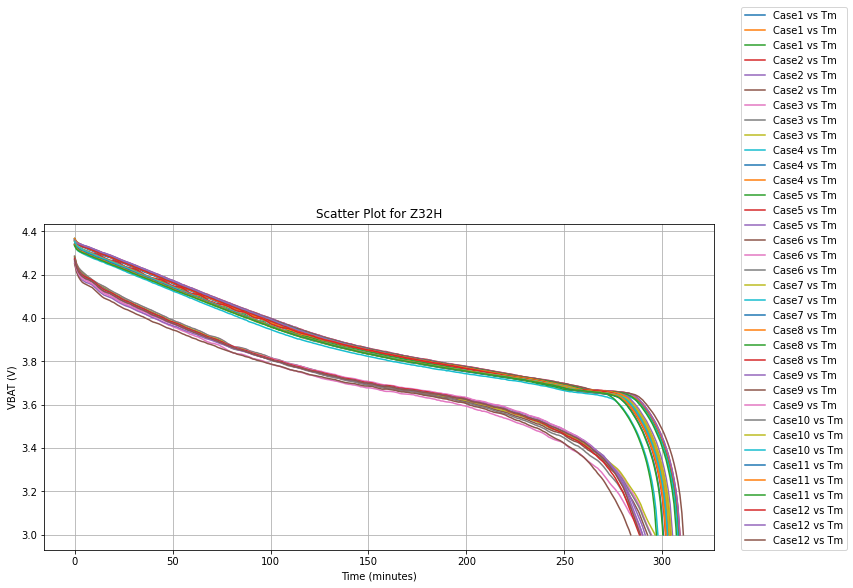

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

cases=["Case"+str(i) for i in range(1,13)]
units=["U"+str(i) for i in range(1,4)]
print(cases)
for cs in cases:
    for u in units:
        subset_df = xls.loc[:, (cs, u)]
        plt.plot(subset_df['Tm'], subset_df['V'], marker=None,label=f"{cs} vs Tm")
plt.xlabel('Time (minutes)')
plt.ylabel('VBAT (V)')
plt.title(f"Scatter Plot for Z32H")
plt.legend(loc=(1.04, 0))
plt.grid(True)

In [170]:
subset_df

,Time,Tm,iD,Q,V
0,00:00:00,0.000000,-6.40,0.00,4.2677
1,00:00:59,0.983333,-6.41,0.11,4.2333
2,00:01:59,1.983333,-6.40,0.21,4.2122
3,00:03:00,3.000000,-6.40,0.32,4.1992
4,00:03:59,3.983333,-6.40,0.43,4.1908
...,...,...,...,...,...
307,NaN,NaN,NaN,NaN,NaN
308,NaN,NaN,NaN,NaN,NaN
309,NaN,NaN,NaN,NaN,NaN
310,NaN,NaN,NaN,NaN,NaN


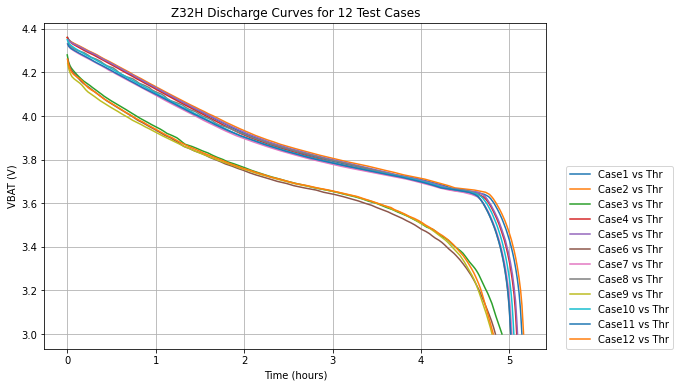

In [171]:
import numpy as np
from scipy import interpolate

vr = np.arange(3, 4.4, 0.01)
fig, ax = plt.subplots(figsize=ltr_dims)
for cs in cases:
        v1 = xls.loc[:, (cs, 'U1','V')]
        v2 = xls.loc[:, (cs, 'U2','V')]
        v3 = xls.loc[:, (cs, 'U3','V')]
        t1 = xls.loc[:, (cs, 'U1','Tm')]
        t2 = xls.loc[:, (cs, 'U2','Tm')]
        t3 = xls.loc[:, (cs, 'U3','Tm')]
        t1p = interpolate.interp1d(v1, t1, fill_value='extrapolate')
        t2p = interpolate.interp1d(v2, t2, fill_value='extrapolate')
        t3p = interpolate.interp1d(v3, t3, fill_value='extrapolate')
        t   = (t1p(vr)+t2p(vr)+t3p(vr))/3
        plt.plot(t/60, vr, marker=None,label=f"{cs} vs Thr")
plt.xlabel('Time (hours)')
plt.ylabel('VBAT (V)')
plt.title(f"Z32H Discharge Curves for 12 Test Cases")
plt.legend(loc=(1.04, 0))
plt.grid(True)

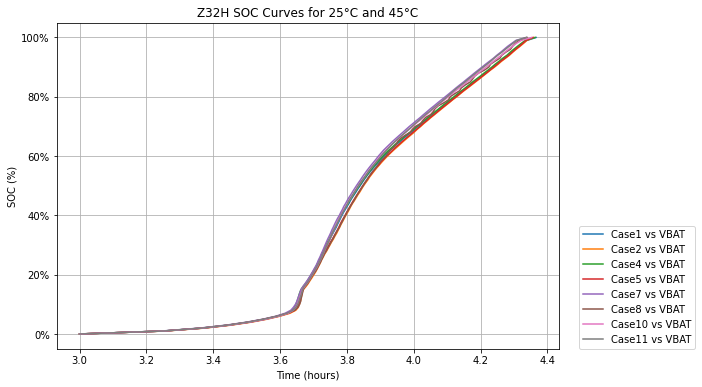

In [172]:
import numpy as np
from scipy import interpolate
import matplotlib.ticker as mtick
qr = np.arange(0, 1.01, 0.01)
cases=["Case"+str(i) for i in [1,2,4,5,7,8,10,11]]  
fig, ax = plt.subplots(figsize=ltr_dims)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for cs in cases:
        v1 = xls.loc[:, (cs, 'U1','V')]
        q1 = xls.loc[:, (cs, 'U1','Q')]
        v1=v1[~np.isnan(q1)]
        q1=q1[~np.isnan(q1)]
        q1 = q1/np.max(q1)

        v2 = xls.loc[:, (cs, 'U2','V')]
        q2 = xls.loc[:, (cs, 'U2','Q')]
        v2=v2[~np.isnan(q2)]
        q2=q2[~np.isnan(q2)]
        q2 = q2/np.max(q2)
        
        q3 = xls.loc[:, (cs, 'U3','Q')]
        v3 = xls.loc[:, (cs, 'U3','V')]
        v3 = v3[~pd.isnull(q3)]
        q3 = q3[~pd.isnull(q3)]
        q3 = q3/np.max(q3) # Mean SOC of UUTs
 
        v1p = interpolate.interp1d(q1, v1, fill_value='extrapolate')
        v2p = interpolate.interp1d(q2, v2, fill_value='extrapolate')
        v3p = interpolate.interp1d(q3, v3, fill_value='extrapolate')
        v   = (v1p(qr)+v2p(qr)+v3p(qr))/3
        if cs=='Case1':
            vstd=v
            qstd=qr
        plt.plot(v, (1-qr)*100, marker=None,label=f"{cs} vs VBAT")
plt.xlabel('Time (hours)')
plt.ylabel('SOC (%)')
plt.title(f"Z32H SOC Curves for 25°C and 45°C")
plt.legend(loc=(1.04, 0))
plt.grid(True)

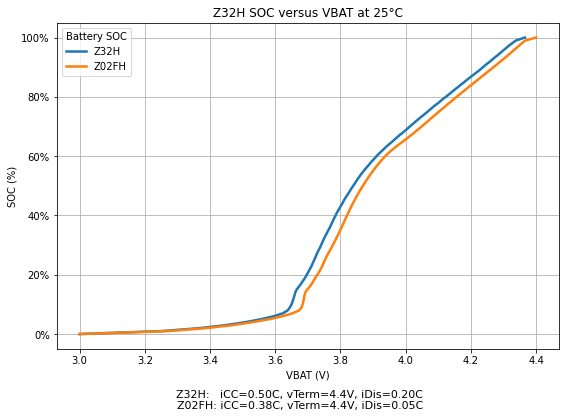

In [173]:
import seaborn as sns
import matplotlib.ticker as mtick

zz=[3,3.27157,3.3882,3.46865,3.53062,3.58101,3.62202,3.65362,3.67333,3.68071,3.68409,3.68634,3.68804,3.68969,3.6921,3.6981,3.70598,3.71238,3.71775,3.72316,3.72922,3.73494,3.73996,3.74435,3.74843,3.75247,3.75682,3.7616,3.76661,3.77168,3.77654,3.78129,3.78596,3.7906,3.79512,3.79943,3.80359,3.80769,3.81178,3.81593,3.82009,3.82438,3.82874,3.83324,3.83786,3.84263,3.84753,3.85261,3.85786,3.86327,3.86883,3.87459,3.88053,3.8867,3.89303,3.89963,3.90649,3.91364,3.92117,3.92906,3.93754,3.94678,3.95698,3.96822,3.98022,3.99243,4.00441,4.01602,4.02724,4.03823,4.049,4.05961,4.07011,4.08074,4.09138,4.10207,4.1128,4.12358,4.13444,4.14534,4.15638,4.16746,4.17866,4.18987,4.20119,4.21251,4.22388,4.23527,4.24664,4.25797,4.26929,4.28052,4.29165,4.30268,4.31355,4.32424,4.33476,4.34518,4.35568,4.36691,4.4
]
zz=zz[::-1]

df = pd.DataFrame({'v':vstd,
                   'v1':zz,
                   'soc':(1-qstd)*100})

ltr_dims = (9, 6)
fig, ax = plt.subplots(figsize=ltr_dims)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

p=sns.lineplot(x='value', y='soc', hue='variable', linewidth=2.5,
             data=pd.melt(df, ['soc']))
p.set_title('Z32H SOC versus VBAT at 25°C')
p.set_xlabel('VBAT (V)')
p.set_ylabel('SOC (%)')
p.legend(title='Battery SOC', loc='upper left', labels=['Z32H', 'Z02FH'])
txt="Z32H:   iCC=0.50C, vTerm=4.4V, iDis=0.20C\nZ02FH: iCC=0.38C, vTerm=4.4V, iDis=0.05C"
plt.figtext(0.5, -0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
p.grid()
